<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/230115_Instagram_Reach_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link

https://thecleverprogrammer.com/2022/03/22/instagram-reach-analysis-using-python/

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

from google.colab import files
import io
import zipfile

In [3]:
upload = files.upload()

Saving InstagramReachAnalysis.zip to InstagramReachAnalysis.zip


In [4]:
z = zipfile.ZipFile(io.BytesIO(upload['InstagramReachAnalysis.zip']))
z.namelist()

['Instagram data.csv']

In [6]:
data = pd.read_csv(z.open(z.namelist()[0]), encoding='latin1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [7]:
cols = [i.lower().replace(' ','_') for i in data.columns]
data.columns = cols
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   impressions     119 non-null    int64 
 1   from_home       119 non-null    int64 
 2   from_hashtags   119 non-null    int64 
 3   from_explore    119 non-null    int64 
 4   from_other      119 non-null    int64 
 5   saves           119 non-null    int64 
 6   comments        119 non-null    int64 
 7   shares          119 non-null    int64 
 8   likes           119 non-null    int64 
 9   profile_visits  119 non-null    int64 
 10  follows         119 non-null    int64 
 11  caption         119 non-null    object
 12  hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [8]:
data.head()

,impressions,from_home,from_hashtags,from_explore,from_other,saves,comments,shares,likes,profile_visits,follows,caption,hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [9]:
data.isnull().sum()

impressions       0
from_home         0
from_hashtags     0
from_explore      0
from_other        0
saves             0
comments          0
shares            0
likes             0
profile_visits    0
follows           0
caption           0
hashtags          0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


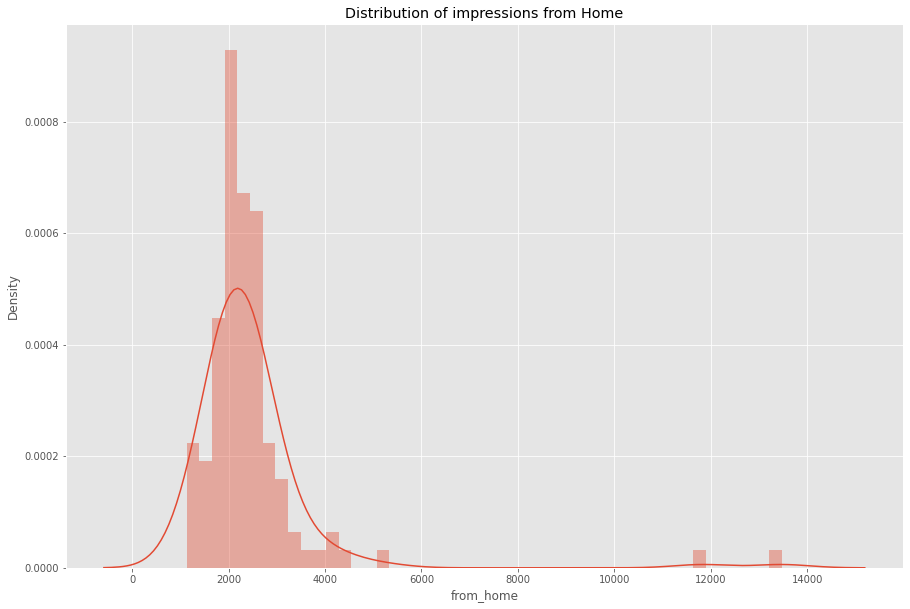

In [11]:
plt.figure(figsize=(15,10))
plt.style.use('ggplot')
plt.title('Distribution of impressions from Home')
sns.distplot(data['from_home'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


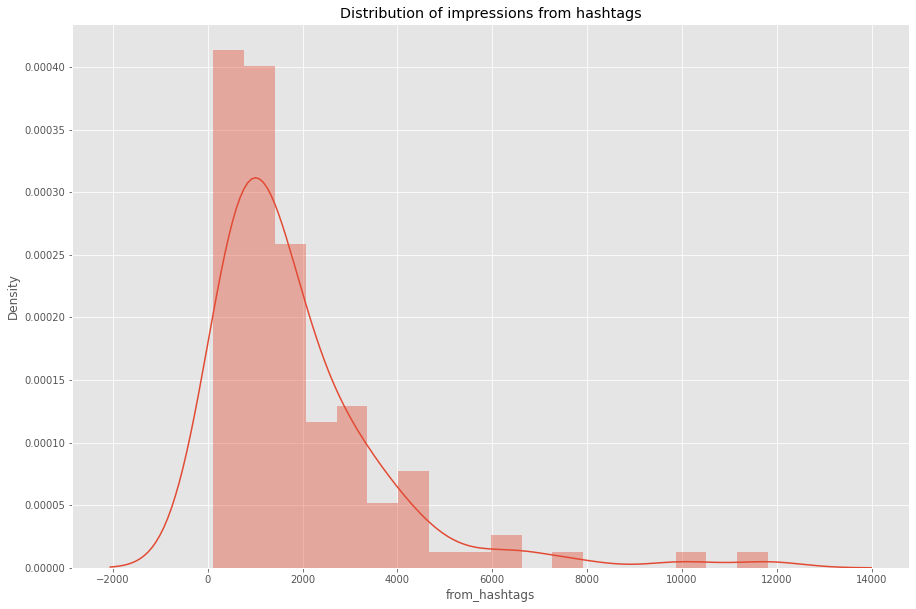

In [12]:
plt.figure(figsize=(15,10))
plt.title('Distribution of impressions from hashtags')
sns.distplot(data['from_hashtags'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


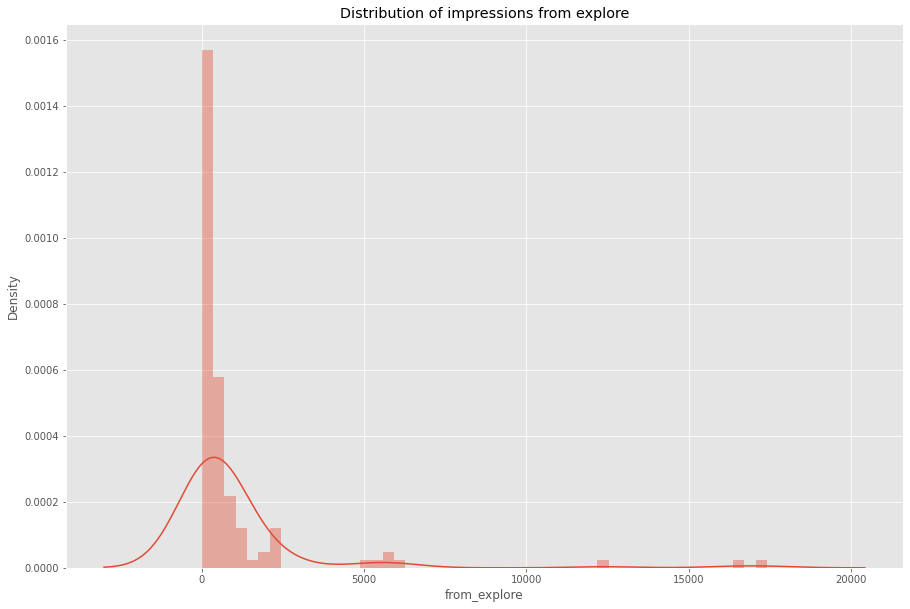

In [13]:
plt.figure(figsize=(15,10))
plt.title('Distribution of impressions from explore')
sns.distplot(data['from_explore'])
plt.show()

In [17]:
home = data['from_home'].sum()
hashtag = data['from_hashtags'].sum()
explore = data['from_explore'].sum()
other = data['from_other'].sum()
labels = ['From_Home', 'From_Hashtag', 'From_Explore', 'Other']
values = [home, hashtag, explore, other]

In [20]:
fig = px.pie(data, values=values, names=labels, hole=0.5, title='Impressions from various sources')
fig.show()

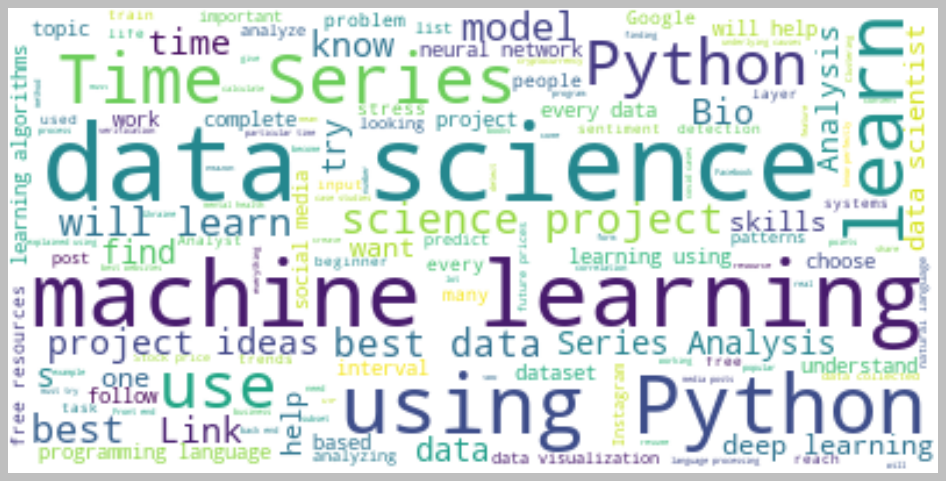

In [21]:
text = ' '.join(i for i in data.caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.style.use('classic')
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

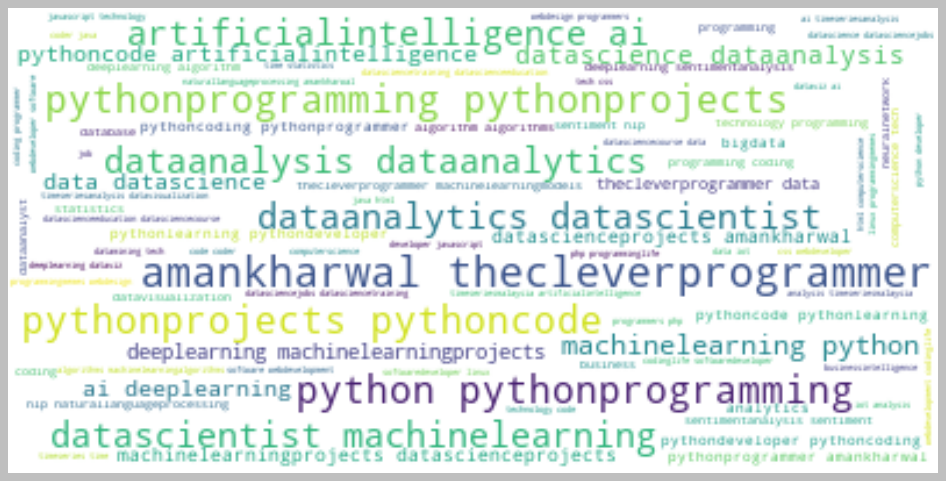

In [22]:
text = ' '.join(i for i in data.hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.style.use('classic')
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
px.scatter(data_frame=data, x='impressions', y='likes', size='likes', trendline='ols', title='Relationship between likes and impressions')

In [24]:
px.scatter(data_frame=data, x='impressions', y='comments', size='comments', trendline='ols', title='Relationship between comments and impressions')

In [27]:
px.scatter(data_frame=data, x='impressions', y='shares', size='shares', trendline='ols', title='Relationship between shares and impressions')

In [28]:
px.scatter(data_frame=data, x='impressions', y='saves', size='saves', trendline='ols', title='Relationship between saves and impressions')

In [30]:
corr = data.corr()
corr['impressions'].sort_values(ascending=False)

impressions       1.000000
from_explore      0.893607
follows           0.889363
likes             0.849835
from_home         0.844698
saves             0.779231
profile_visits    0.760981
shares            0.634675
from_other        0.592960
from_hashtags     0.560760
comments         -0.028524
Name: impressions, dtype: float64

In [31]:
conversion_rate = (data["follows"].sum() / data["profile_visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


In [32]:
px.scatter(data_frame=data, x='profile_visits', y='follows', size='follows', trendline='ols', title='Relationship between profile visits and follows')

In [33]:
x = np.array(data[['likes', 'saves', 'comments', 'shares', 'profile_visits', 'follows']])
y = np.array(data['impressions'])

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((95, 6), (24, 6), (95,), (24,))

In [35]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)

PassiveAggressiveRegressor()

In [36]:
model.score(xtest, ytest)

0.8626923480345744

In [37]:
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([12068.4298023])